# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [354]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [498]:
kc_df= pd.read_csv('kc_house_data_train.csv', index_col=0)
kc_df_test = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
zip_score = pd.read_csv('Niche.csv')[['zipcode', 'school_grade', 'population']]
kc_df = zip_score.set_index('zipcode').join(kc_df.set_index('zipcode'))

In [499]:
kc_df.describe()

,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,34178.938230,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,47.560058,-122.214258,1987.986698,12873.475824
std,12365.309821,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,0.138412,0.140857,684.802635,27227.437583
min,3260.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,659.000000
25%,25426.000000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,35028.000000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,43119.000000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,47.677900,-122.126000,2360.000000,10101.750000
max,67779.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,858132.000000


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [500]:
kc_df.isnull().sum()

school_grade     0
population       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [501]:
kc_df.corr()

,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
population,1.000000,0.035476,-0.101279,0.016303,-0.057795,-0.091031,-0.153364,-0.026913,-0.041528,-0.094833,0.042208,-0.066886,-0.101441,0.000837,-0.034187,-0.027860,-0.017963,-0.212644,-0.097630,-0.181489
id,0.035476,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.001865,0.017388,-0.007494,-0.139605
price,-0.101279,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,0.302394,0.019327,0.585567,0.081423
bedrooms,0.016303,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.002170,0.124279,0.387589,0.026665
bathrooms,-0.057795,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.091031,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.153364,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.082029,0.226190,0.136959,0.701875
floors,-0.026913,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,0.048227,0.128795,0.283933,-0.008170
waterfront,-0.041528,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,-0.013331,-0.042728,0.091090,0.026895
view,-0.094833,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.003820,-0.077572,0.279999,0.073185


In [502]:
kc_df.describe()

,population,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,34178.938230,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,47.560058,-122.214258,1987.986698,12873.475824
std,12365.309821,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,0.138412,0.140857,684.802635,27227.437583
min,3260.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,659.000000
25%,25426.000000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,35028.000000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,43119.000000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,47.677900,-122.126000,2360.000000,10101.750000
max,67779.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,858132.000000


In [503]:
kc_df[summary_features].describe()

,yr_built,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,1970.792019,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,3.408502,7.654425,1987.986698,12873.475824
std,29.343516,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.651296,1.174718,684.802635,27227.437583
min,1900.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,1.000000,1.000000,399.000000,659.000000
25%,1951.000000,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,3.000000,7.000000,1490.000000,5111.250000
50%,1974.000000,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,3.000000,7.000000,1840.000000,7622.500000
75%,1996.000000,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,4.000000,8.000000,2360.000000,10101.750000
max,2015.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,6210.000000,858132.000000


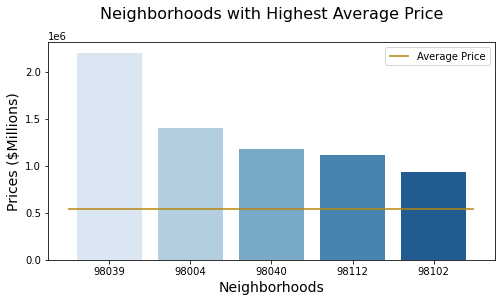

In [504]:
#--------------------Top 5 highest Property Values by Zipcode Calculation-------------------#
kc_top5_zipcodes = kc_df.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
kc_mean_price = kc_df.price.mean()

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price,  order=kc_top5_zipcodes.index, palette="Blues")
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#create labels for title and axis
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($Millions)", size=14)
plt.title("Neighborhoods with Highest Average Price", size=16, y=1.08)
plt.legend() #show legend
plt.show();

In [505]:
alpha = 0.05 
top_5_zip = kc_df[kc_df.zipcode.isin(kc_top5_zipcodes.index)]
formula = 'price~C(zipcode)'
zip_5_lm = smf.ols(formula, top_5_zip).fit()
anova_zip_5 = sm.stats.anova_lm(zip_5_lm, typ=2)

anova_zip_5

AttributeError: 'DataFrame' object has no attribute 'zipcode'

In [ ]:
#-------------------Conditions Calculation--------------------------------#
condition_mean = kc_df.groupby("condition")["price"].mean()
condition_median = kc_df.groupby("condition")["price"].median()
condition_score = np.arange(1,6)

In [ ]:
kc_mean_price = kc_df['price'].mean()

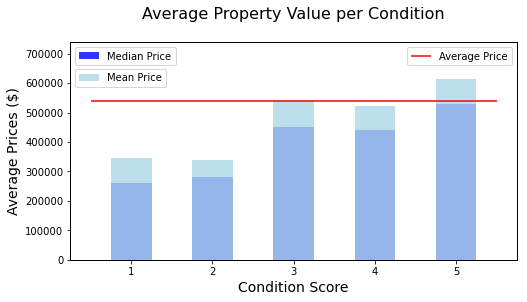

In [506]:
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx()
ax3 = ax.twinx()
width = 0.5

ax.bar(x=condition_score, height=condition_median, width=width,
       label="Median Price", color="blue", alpha=0.8)
ax2.bar(x=condition_score, height=condition_mean, width=width,
        label="Mean Price", color="lightblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(kc_mean_price, .5 ,5.5, colors="red", label="Average Price")

#this is a good way to get right of you right axis and setting your y axis so that it can containe all the data within your bar graph
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#create labels and axis for graph
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)
plt.legend()
plt.show();

In [507]:
#---------------------Anova for conditions--------------------------------#
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = smf.ols(formula, kc_df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The property condition have a statistically significant impact on average property value
Conditions F-statisic Probability:  6.813536869420509e-24


In [508]:
#--------------------------Floor Calculations-----------------------------#
floor_mean = kc_df.groupby("floors")["price"].mean()
floor_median = kc_df.groupby("floors")["price"].median()
floor_number = floor_mean.index

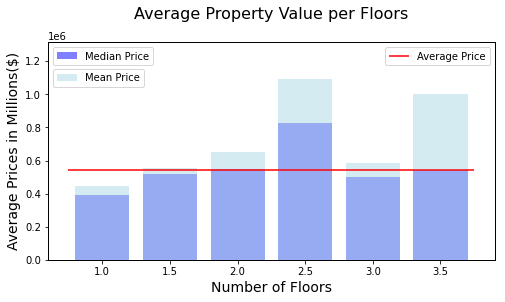

In [509]:
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx()
ax3 = ax.twinx()
width = 0.5

ax.bar(x=floor_number, height=floor_median, width=.4,
       label="Median Price", color="blue", alpha=0.5)
ax2.bar(x=floor_number, height=floor_mean, width=.4,
        label="Mean Price", color="lightblue", alpha=0.5)

#horizontal line for mean price
ax3.hlines(kc_mean_price, .75 , 3.75, colors="red", label="Average Price")

#this is a good way to get right of you right axis and setting your y axis so that it can containe all the data within your bar graph
ax.set_ylim(0,1.2*floor_mean.max())
ax2.set_ylim(0,1.2*floor_mean.max())
ax3.set_ylim(0,1.2*floor_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#create labels and axis for graph
ax.set_ylabel("Average Prices in Millions($)", size=14)
ax.set_xlabel("Number of Floors", size=14)
plt.title("Average Property Value per Floors", size=16, y=1.08)
plt.legend()
plt.show();

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [513]:
def n_bed(row):
    if row['bedrooms'] == 0:
        row['bedrooms']= kc_df['bedrooms'].mean()
    if row['bedrooms'] > 10:
        row['bedrooms'] = 10
    return row
#creating floors and ceilings for bedrooms

In [514]:
kc_df = kc_df.apply(n_bed, axis=1)

In [531]:
def n_bath(row):
    if row['bathrooms'] == 0:
        row['bathrooms'] = 1
    if row['bedrooms'] > 8:
        row['bedrooms'] = 8
    return row

In [532]:
kc_df = kc_df.apply(n_bath, axis=1)

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [520]:
kc_df["renovated"] = kc_df.yr_renovated.apply(lambda x: 1 if x > 0 else 0)
kc_df["renovation_age"] = kc_df.yr_renovated.apply(lambda x: 2020-x if x > 0 else 0)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [521]:
kc_df['sqft_basement'] = np.where(kc_df['sqft_basement']!=0, 1, 0)
kc_df["renovated"] = kc_df.yr_renovated.apply(lambda x: 1 if x != 0 else 0)
kc_df['master_br'] = kc_df.bedrooms.apply(lambda x: 1 if x >2 else 0)

In [522]:
kc_df['master_br'].value_counts()

1    14926
0     2364
Name: master_br, dtype: int64

In [ ]:
categorical = ['condition', 'view', 'floors', 'grade'

In [ ]:
def to_dummies(df, features):
    """
    Generating dummy variables for feature
    parama: df
            features - list of features
    """
    d_df = []
    for f in features:
        d_df.append(pd.get_dummies(df[f], prefix='{}'.format(str(f)[:3]), drop_first=True))
    df = df.drop(features, axis = 1)
    df = pd.concat([df] + d_df ,axis=1)
    return df

In [ ]:
kc_df = to_dummies(kc_df, categorical)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

SyntaxError: invalid syntax (<ipython-input-309-4632bda73a4d>, line 4)

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [523]:
kc_df['yr_updated'] = np.nan

In [524]:
def yr_update(row):
    if row['yr_renovated'] == 0:
        row['yr_updated'] = 2021 - row['yr_built']
    if row['yr_renovated'] != 0:
        row['yr_updated'] = 2021 - row['yr_renovated']
    return row

In [525]:
kc_df.apply(yr_update, axis=1)

,school_grade,population,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,renovated,master_br,renovation_age,yr_updated
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,B-,32625,9264450460,20140603T000000,309000.0,5.0,2.75,2481,4045,2.0,...,2014,0,47.2602,-122.284,2363,4175,0,1,0,7
98001,B-,32625,6181400920,20150430T000000,286651.0,3.0,2.50,1830,4997,2.0,...,2004,0,47.3035,-122.283,2488,4998,0,1,0,17
98001,B-,32625,1311910300,20150204T000000,260000.0,5.0,2.25,2320,6375,1.0,...,1967,0,47.3351,-122.282,1760,7600,0,1,0,54
98001,B-,32625,3751604895,20140605T000000,165000.0,3.0,1.00,1150,19200,1.0,...,1908,0,47.2756,-122.270,1290,19200,0,1,0,113
98001,B-,32625,8856001090,20150130T000000,185900.0,3.0,1.00,940,10890,1.0,...,1909,0,47.2763,-122.257,1370,10255,0,1,0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98199,A-,21954,6821102100,20150317T000000,510000.0,2.0,1.00,810,6480,1.0,...,1942,0,47.6493,-122.398,1920,6000,0,0,0,79
98199,A-,21954,1373800330,20150420T000000,1115000.0,4.0,2.50,3690,11191,1.0,...,1951,0,47.6434,-122.412,3460,8160,0,1,0,70
98199,A-,21954,1877500090,20150211T000000,756000.0,3.0,2.50,3560,8297,1.0,...,1948,0,47.6473,-122.407,2760,8297,0,1,0,73


In [495]:
kc_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,bedroom_squared,bathroom_squared,waterfront_br,basement,renovated,master_br,waterfront_sqftlot
0,2591820310,20141006T000000,365000.0,4.0,2.25,2070,8893,2.0,0,0,...,-122.162,2390,7700,16,5.0625,0,0,0,1,0
1,7974200820,20140821T000000,865000.0,5.0,3.00,2900,6730,1.0,0,0,...,-122.285,2370,6283,25,9.0000,0,1,0,1,0
2,7701450110,20140815T000000,1038000.0,4.0,2.50,3770,10893,2.0,0,2,...,-122.129,3710,9685,16,6.2500,0,0,0,1,0
3,9522300010,20150331T000000,1490000.0,3.0,3.50,4560,14608,2.0,0,2,...,-122.228,4050,14226,9,12.2500,0,0,0,1,0
4,9510861140,20140714T000000,711000.0,3.0,2.50,2550,5376,2.0,0,0,...,-122.083,2250,4050,9,6.2500,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5.0,2.50,3240,9960,1.0,0,1,...,-122.112,2730,10400,25,6.2500,0,1,0,1,0
17286,8819900270,20140520T000000,440000.0,2.0,1.75,1300,4000,2.0,0,0,...,-122.288,1350,4013,4,3.0625,0,0,0,0,0
17287,3816300095,20140514T000000,310000.0,3.0,1.00,1050,9876,1.0,0,0,...,-122.262,1760,9403,9,1.0000,0,0,0,1,0
17288,122069107,20141204T000000,427500.0,3.0,1.50,1900,43186,1.5,0,0,...,-121.990,2080,108028,9,2.2500,0,1,0,1,0


In [496]:
kc_df = kc_df.apply(yr_update, axis=1)

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [370]:
# your code here
# squaring our bedrooms
kc_df["bedroom_squared"] = kc_df["bedrooms"] ** 2
kc_df["bathroom_squared"] = kc_df["bathrooms"] ** 2

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [371]:
# your code here
kc_df['waterfront_br'] = kc_df['waterfront'] * kc_df['bedrooms']
(kc_df['waterfront_br']>1).value_counts()
kc_df['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [475]:
kc_df
target = ['price']
summary_features = ["yr_built", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
                    "floors", "waterfront", "view", "condition", "grade", "sqft_living15", "sqft_lot15", ]

In [478]:
def model_test(df, features, target):
    target = df[target]
    df_feature = df[features]
    x_train, x_test, y_train, y_test = train_test_split(df_feature, 
    target, random_state = 34, test_size = 0.2)
    lm = linear_model.LinearRegression()
    lm = lm.fit(x_train, y_train)
    y_train_pred = lm.predict(x_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(x_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('Training: ', int(train_rmse), 'vs. Testing: ', int(test_rmse))

In [479]:
model_test(kc_df, summary_features, target)

Training:  228506 vs. Testing:  238172


In [458]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(kc_df[summary_features], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 10) Target:  (13832,)
Training set - Features:  (3458, 10) Target:  (3458,)


In [459]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

-865568.6269904613
[-1.10347962e+03  8.46749689e+03  1.40263704e+02  3.60864876e+04
  1.56123667e+05 -2.05508828e+04  6.31006033e+04  1.07160621e+05
  2.82648322e+01  1.67252399e+01]


In [460]:
y_train_pred = lm.predict(X_train)

In [461]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 156875.64558943652
Mean Squared Error: 57471459900.831696
Root Mean Squared Error: 239732.05855878285


In [462]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.4202187794336405
Z-Score of Root Mean Squared Error: 0.6421641336370013


In [463]:
price_std

373318.97874928213

In [464]:
y_pred = lm.predict(X_test)

In [465]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.5735839326482812


In [466]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:159090.66257397085
Mean Squared Error:60942659311.9203
Root Mean Squared Error:246865.67058204004


In [467]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.4261520887766459
Root Mean Squared Error Z: 0.6612727577073785


In [383]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  0 vs. Testing:  0


### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/